In [243]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [244]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
learn = pd.read_csv('/content/drive/MyDrive/INNHotelsGroup.csv')

In [246]:
data = learn.copy()

In [247]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [352]:
data.tail()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,1
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,0
36274,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,1


In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [248]:
data.duplicated().sum()

0

In [249]:
data.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [250]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


In [251]:
data.shape

(36275, 19)

In [252]:
data['arrival_month'].nunique()

12

In [253]:
data['arrival_month'].value_counts()

,count
arrival_month,
10,5317
9,4611
8,3813
6,3203
12,3021
11,2980
7,2920
4,2736
5,2598


In [254]:
data['Booking_ID'].nunique()

36275

In [255]:
data = data.drop(['Booking_ID'], axis=1)

# **Exploratory Data Analysis (EDA)**

**The below functions need to be defined to carry out the EDA.**

In [256]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [257]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [258]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [259]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

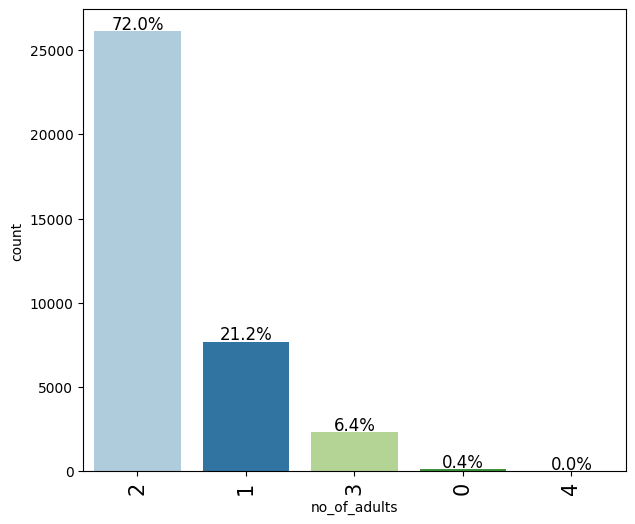

In [260]:
barplot = labeled_barplot(data, "no_of_adults",perc = True)

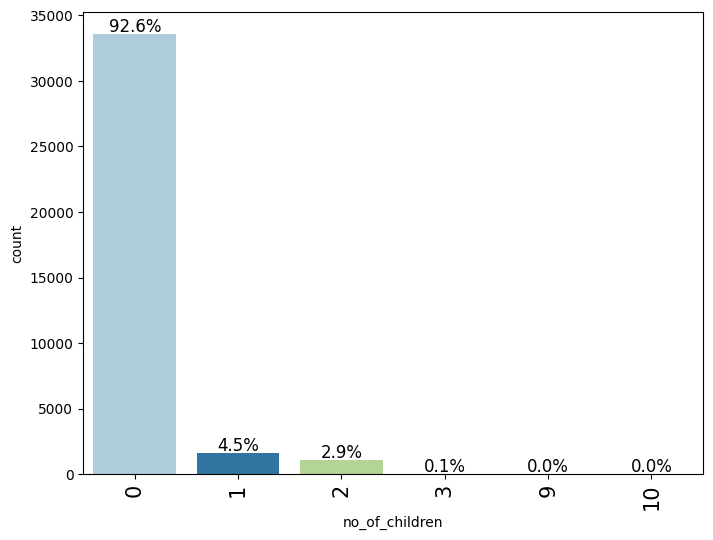

In [261]:
barplot = labeled_barplot(data, "no_of_children",perc = True)

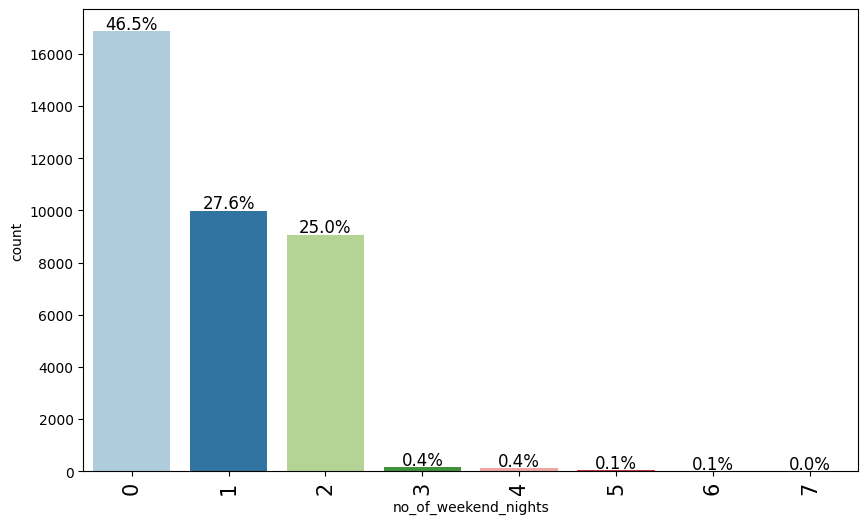

In [262]:
barplot = labeled_barplot(data, "no_of_weekend_nights",perc = True)

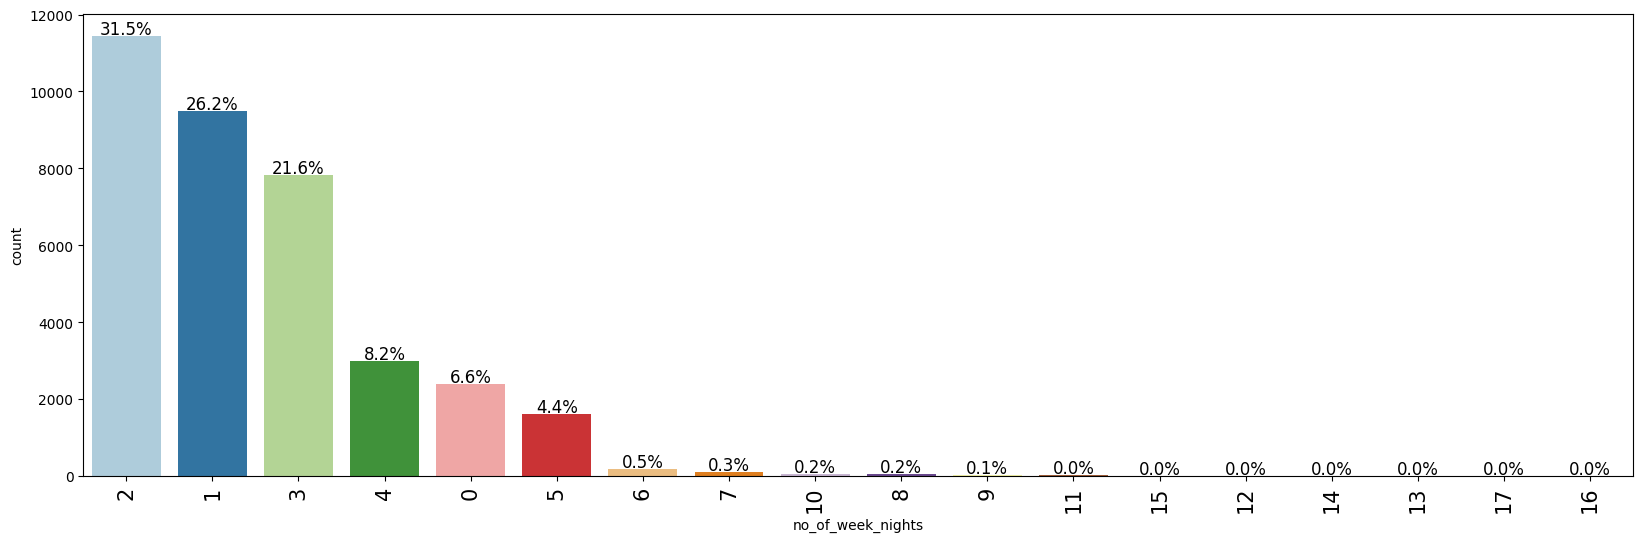

In [263]:
barplot = labeled_barplot(data, "no_of_week_nights",perc = True)

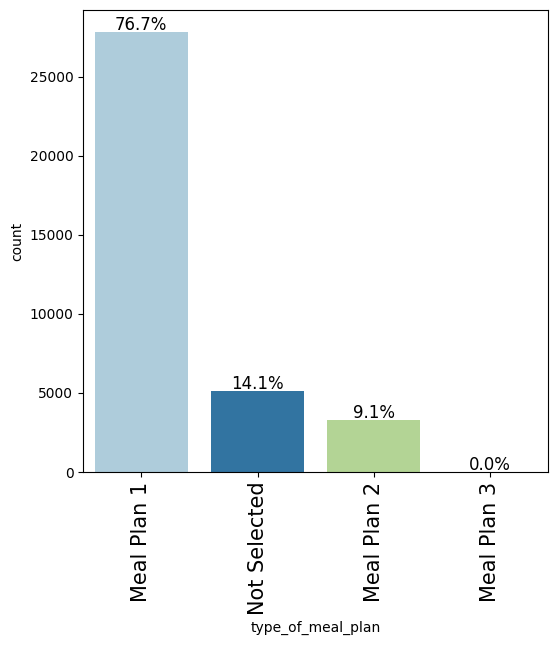

In [264]:
barplot = labeled_barplot(data, "type_of_meal_plan", perc = True)

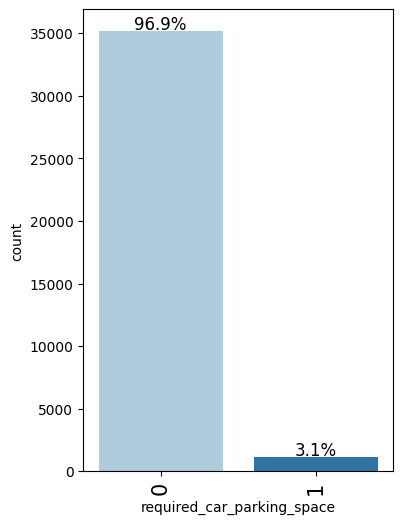

In [265]:
barplot = labeled_barplot(data, "required_car_parking_space", perc = True)

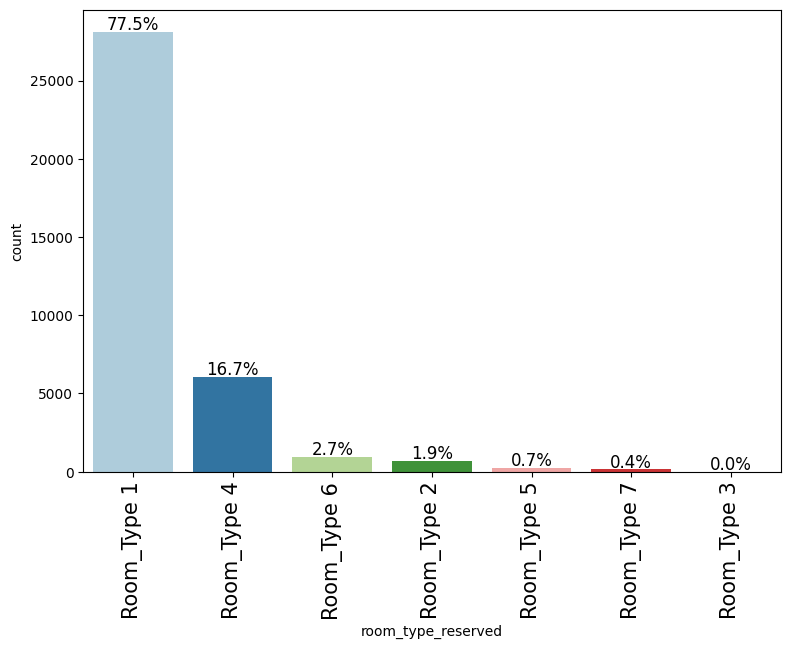

In [266]:
barplot = labeled_barplot(data, "room_type_reserved",perc = True)

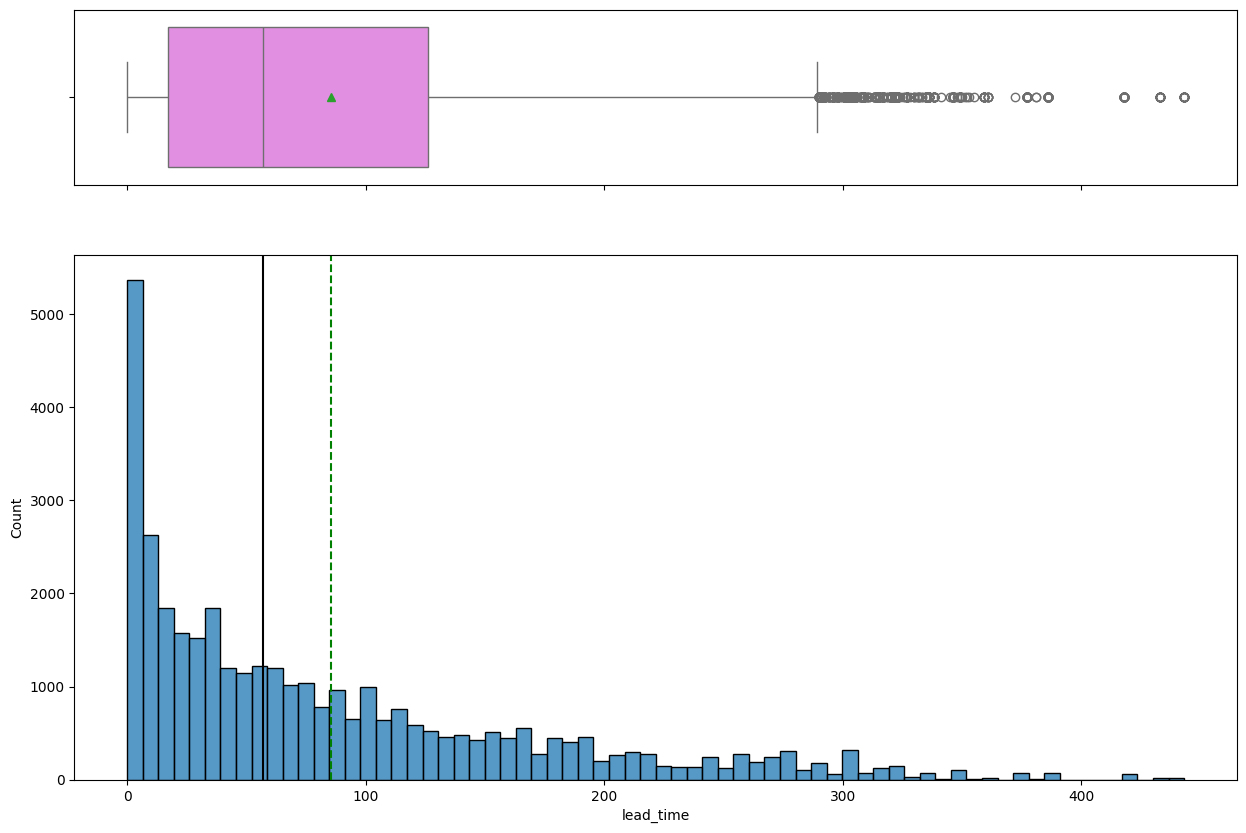

In [267]:
histogram_boxplot(data, "lead_time")

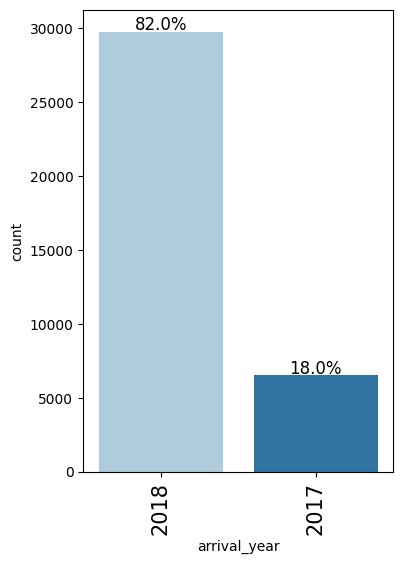

In [268]:
barplot = labeled_barplot(data, "arrival_year",perc = True)

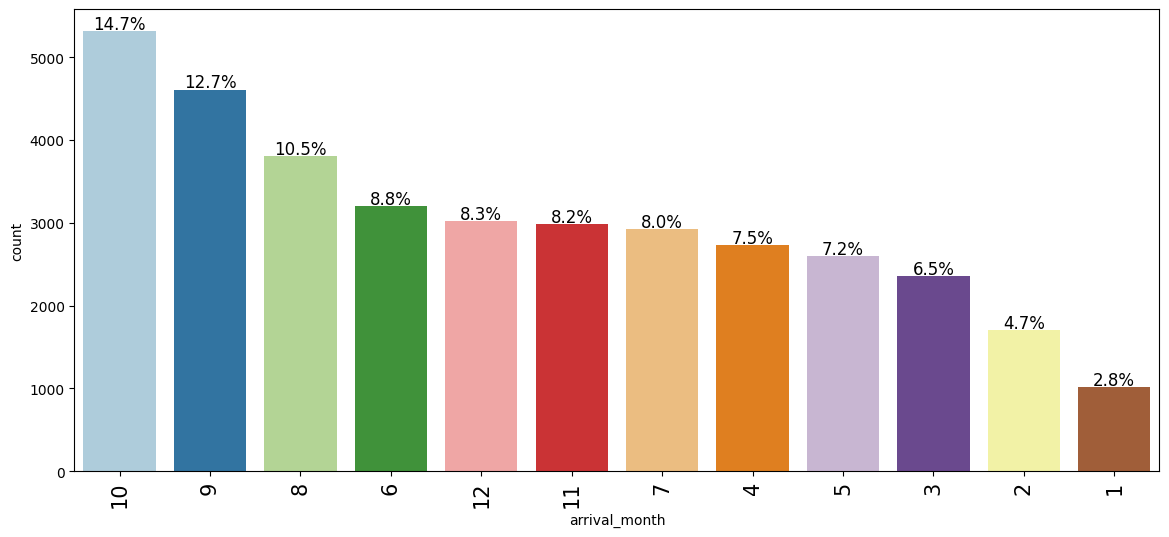

In [269]:
barplot = labeled_barplot(data, "arrival_month", perc = True)

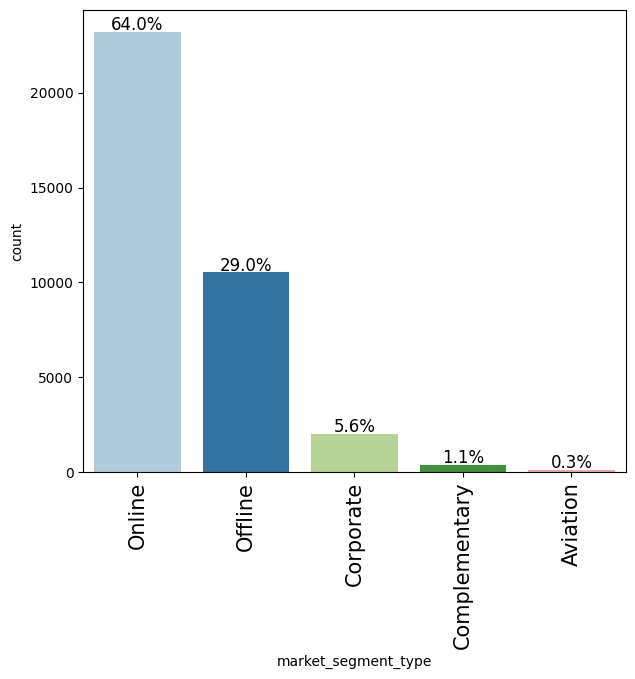

In [270]:
barplot = labeled_barplot(data, "market_segment_type", perc = True)

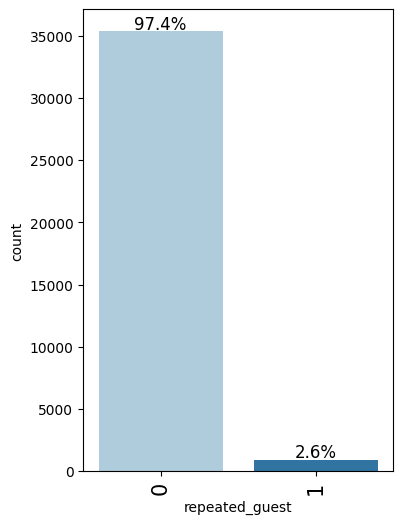

In [271]:
barplot = labeled_barplot(data, "repeated_guest", perc = True)

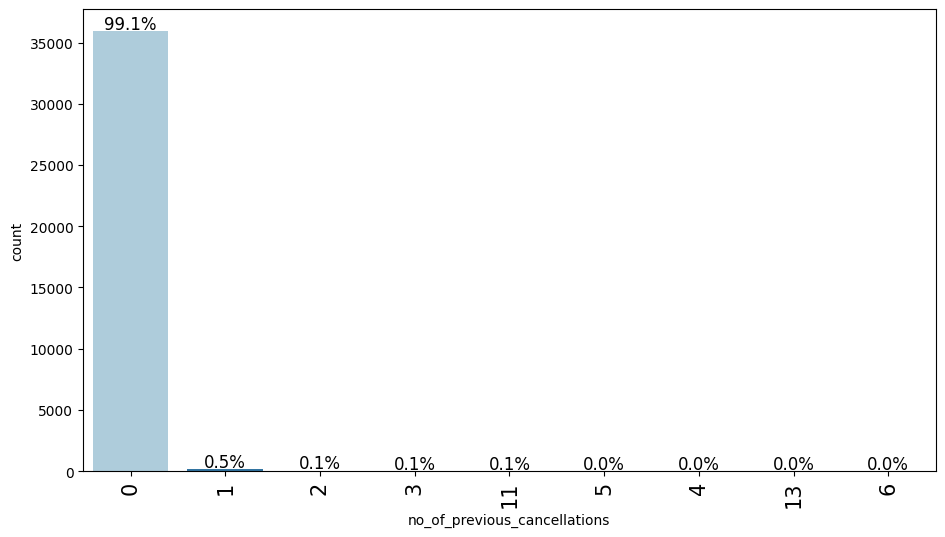

In [272]:
barplot= labeled_barplot(data, "no_of_previous_cancellations", perc = True)

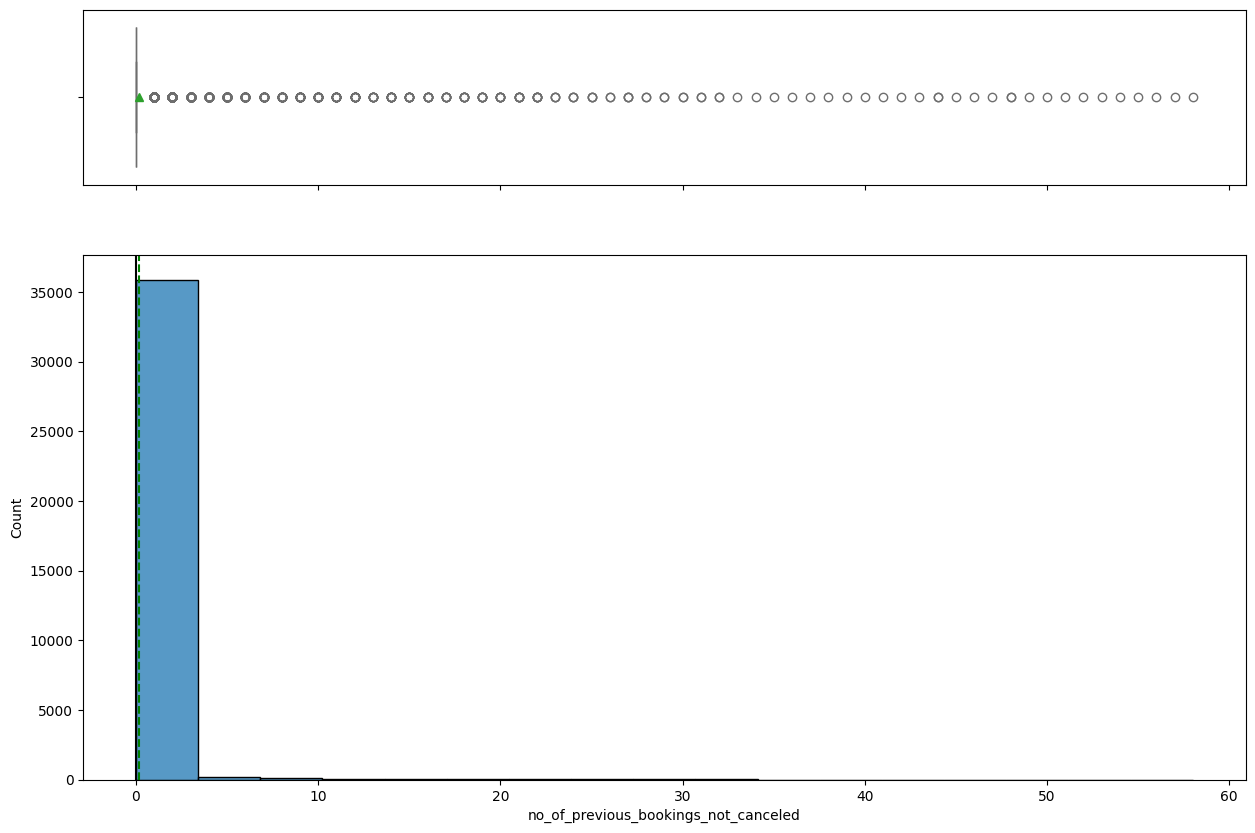

In [273]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

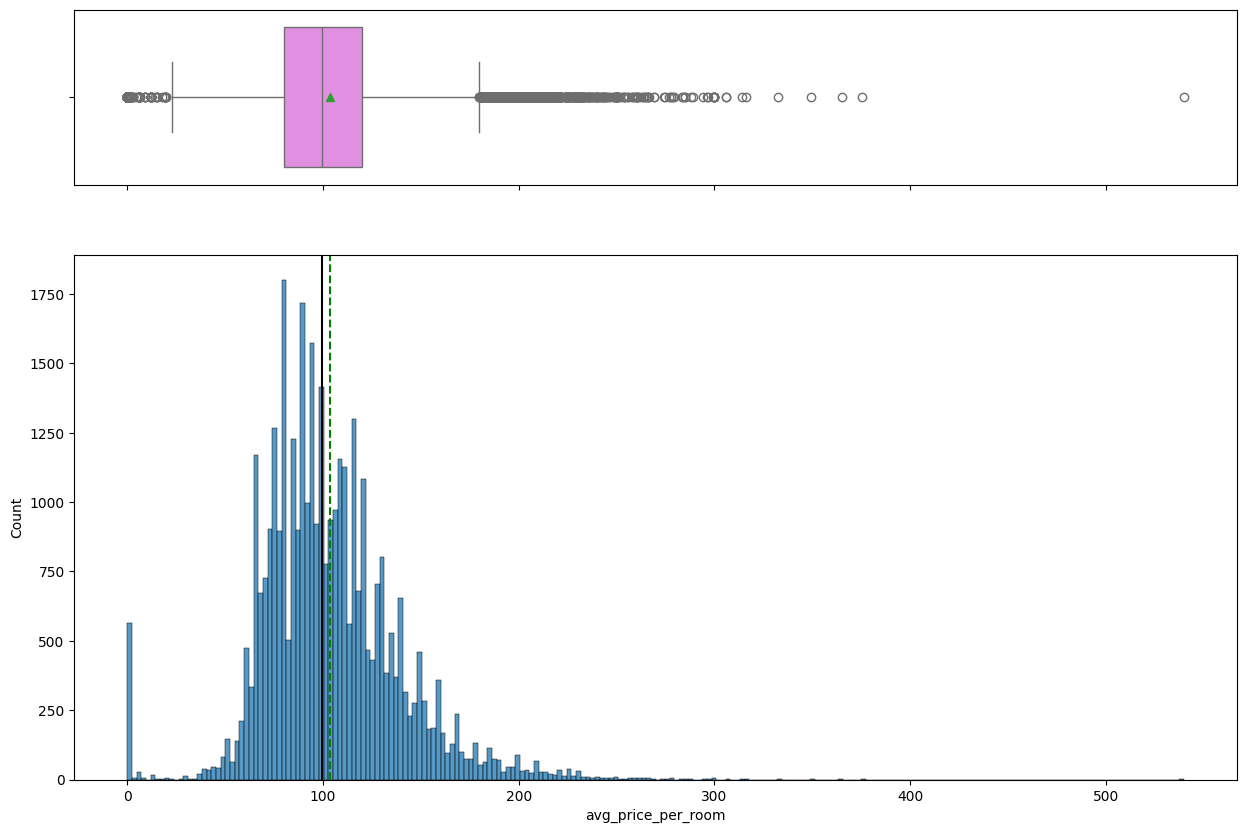

In [274]:
  histogram_boxplot(data, "avg_price_per_room")

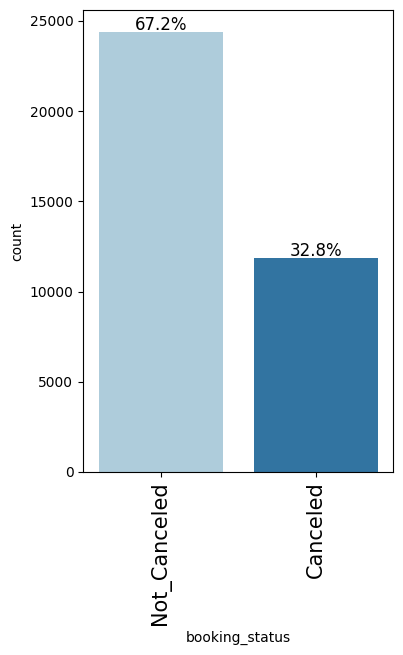

In [275]:
barplot = labeled_barplot(data, "booking_status", perc=True)

### Bivariate Analysis

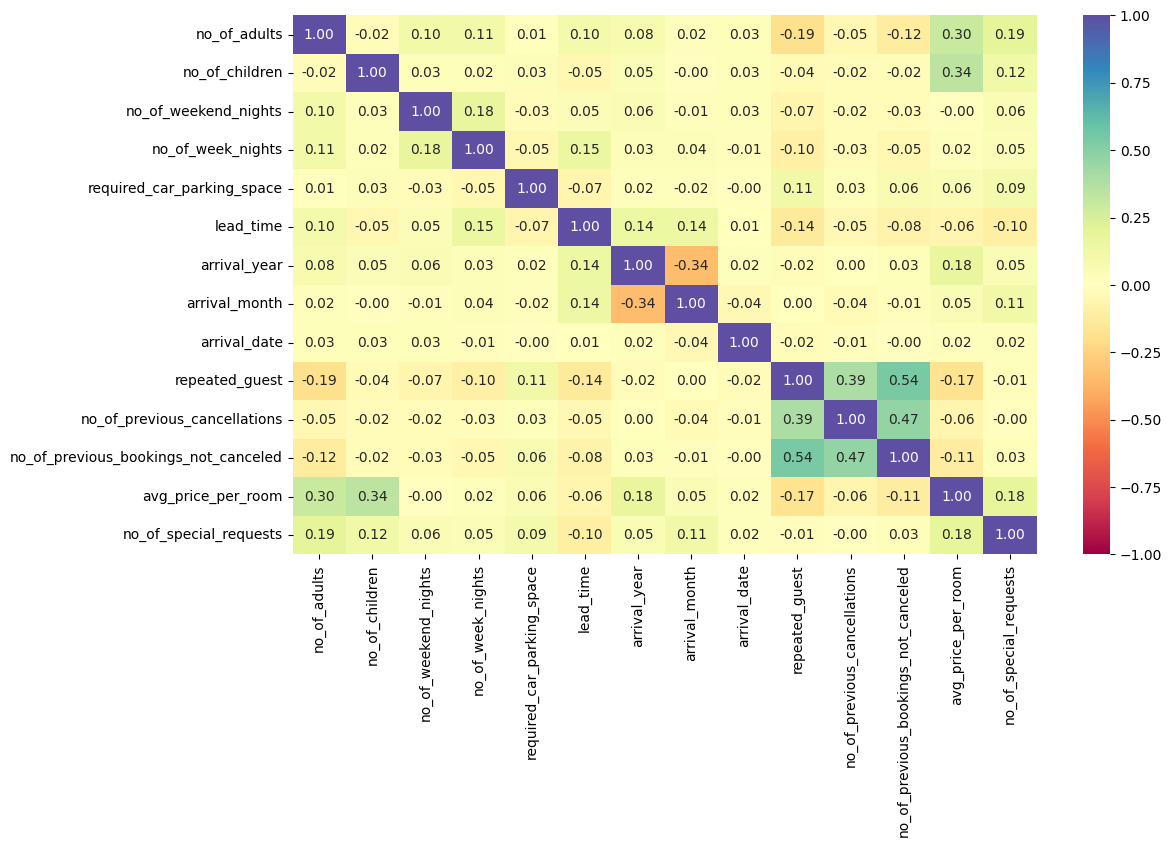

In [276]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

###Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [277]:
# Summary statistics for average price per room by market segment
price_summary = data.groupby('market_segment_type')['avg_price_per_room'].describe()
print(price_summary)

# Checking for unique values in market_segment_type
print(data['market_segment_type'].unique())

                          count      mean      std      min      25%  \
market_segment_type                                                    
Aviation              125.00000 100.70400  8.53836 79.00000 95.00000   
Complementary         391.00000   3.14176 15.51297  0.00000  0.00000   
Corporate            2017.00000  82.91174 23.69000 31.00000 65.00000   
Offline             10528.00000  91.63268 24.99560 12.00000 75.00000   
Online              23214.00000 112.25685 35.22032  0.00000 89.00000   

                          50%       75%       max  
market_segment_type                                
Aviation             95.00000 110.00000 110.00000  
Complementary         0.00000   0.00000 170.00000  
Corporate            79.00000  95.00000 220.00000  
Offline              90.00000 109.00000 540.00000  
Online              107.10000 131.75000 375.50000  
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


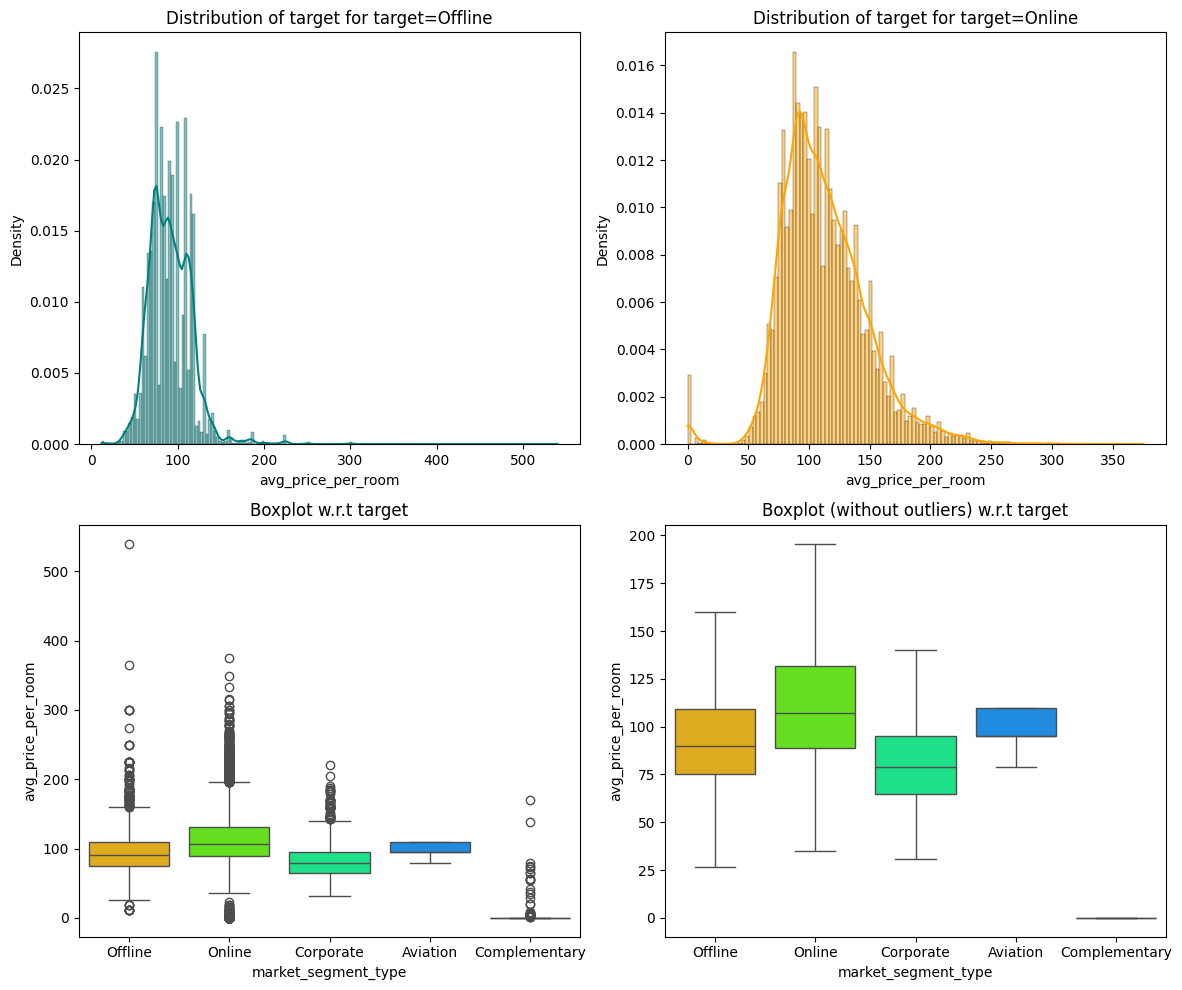

In [354]:
distribution_plot_wrt_target(data, "avg_price_per_room", "market_segment_type")

###Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [278]:
# Filter data to include only repeating guests
repeating_guests_data = data[data['repeated_guest'] == 1]

# Calculate the total number of repeating guests bookings
total_repeating_bookings = repeating_guests_data.shape[0]

# Calculate the number of canceled bookings among repeating guests
canceled_repeating_bookings = repeating_guests_data[repeating_guests_data['booking_status'] == 'Canceled'].shape[0]

# Calculate the percentage of cancellations
cancellation_rate_repeating_guests = (canceled_repeating_bookings / total_repeating_bookings) * 100

print(f"Percentage of repeating guests who cancel: {cancellation_rate_repeating_guests:.2f}%")

Percentage of repeating guests who cancel: 1.72%


In [279]:
# Calculate the overall cancellation rate
total_bookings = data.shape[0]
canceled_bookings = data[data['booking_status'] == 'Canceled'].shape[0]
overall_cancellation_rate = (canceled_bookings / total_bookings) * 100

print(f"Overall cancellation rate: {overall_cancellation_rate:.2f}%")

# Comparison
if cancellation_rate_repeating_guests > overall_cancellation_rate:
    print("Repeating guests cancel more frequently than the average guest.")
elif cancellation_rate_repeating_guests < overall_cancellation_rate:
    print("Repeating guests cancel less frequently than the average guest.")
else:
    print("Repeating guests cancel at the same rate as the average guest.")

Overall cancellation rate: 32.76%
Repeating guests cancel less frequently than the average guest.


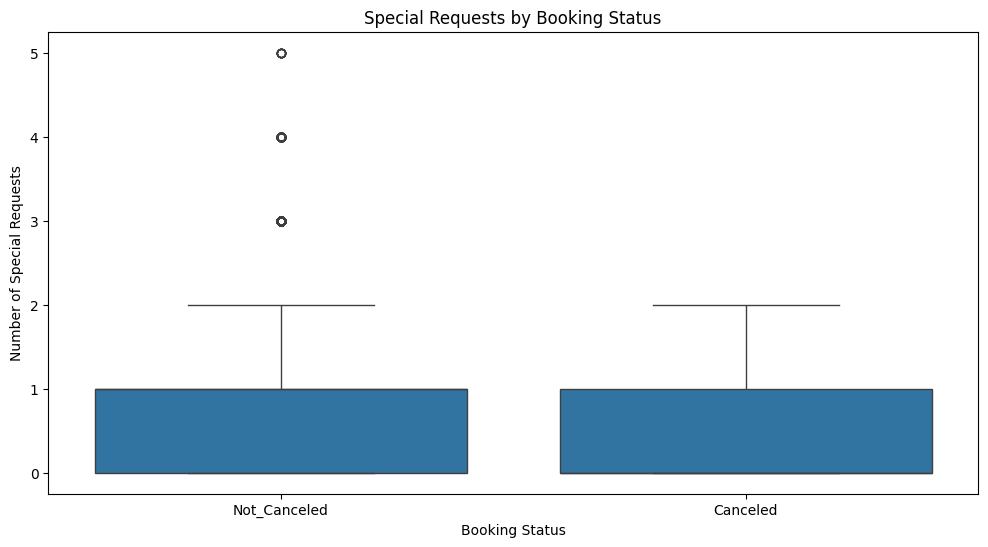

In [280]:
# Box plot to compare special requests between canceled and non-canceled bookings
plt.figure(figsize=(12, 6))
sns.boxplot(x='booking_status', y='no_of_special_requests', data=data)
plt.title('Special Requests by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Number of Special Requests')
plt.show()


booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


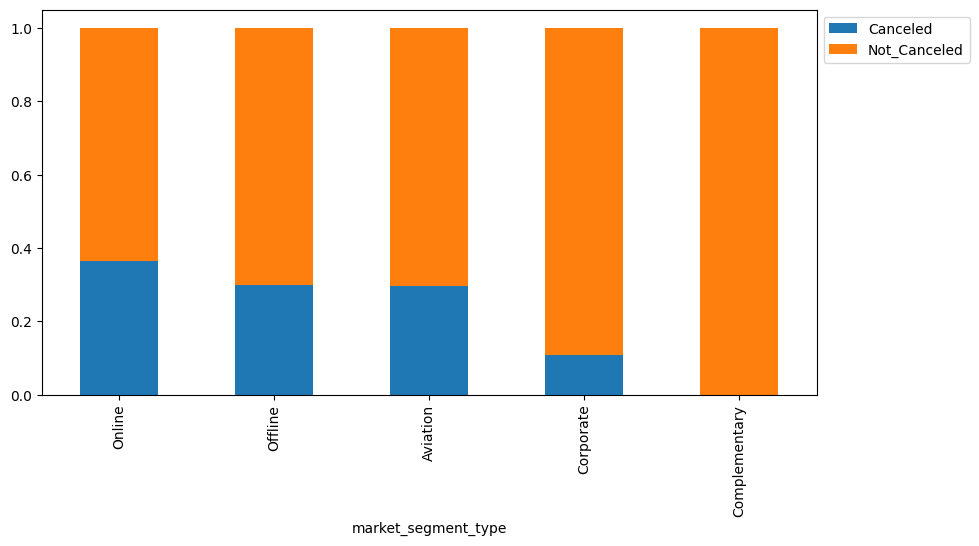

In [281]:
stacked_barplot(data, "market_segment_type", "booking_status")

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


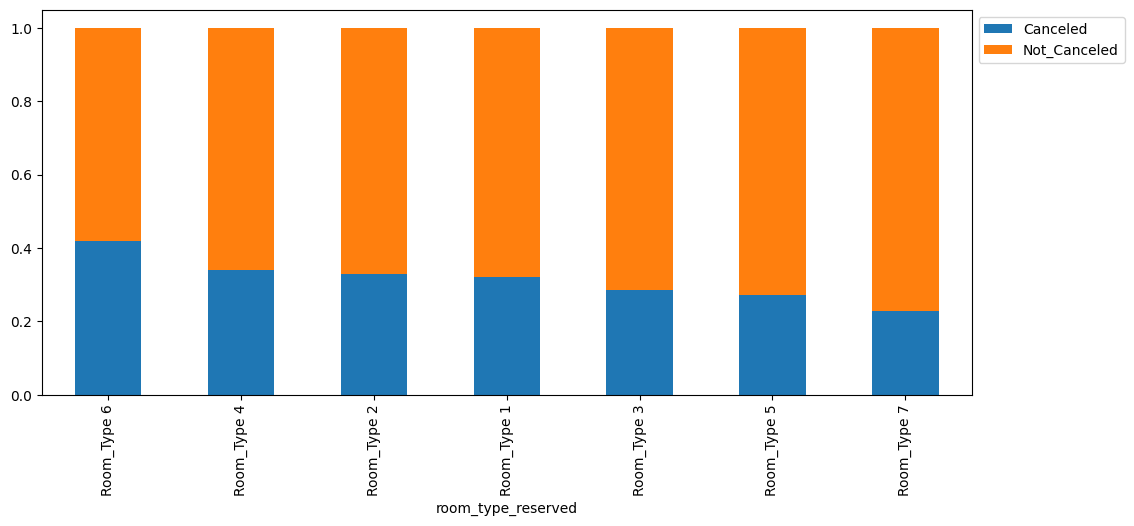

In [282]:
stacked_barplot(data, "room_type_reserved", "booking_status")

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


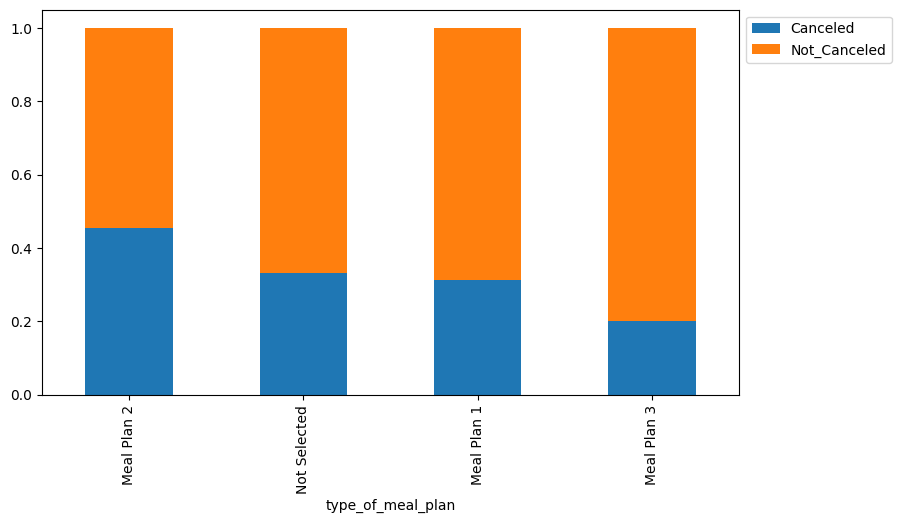

In [283]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


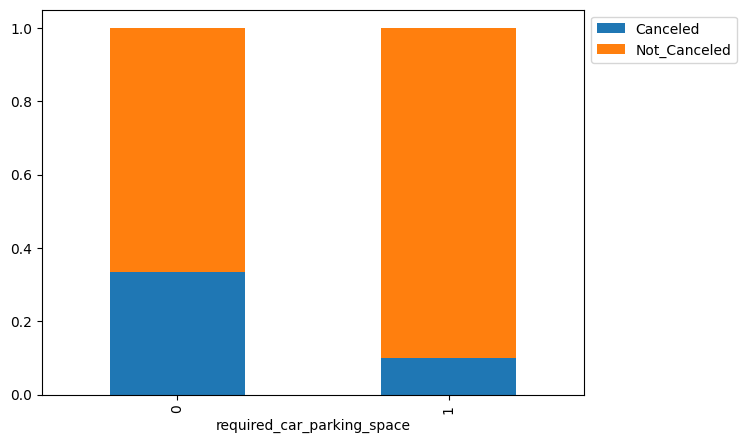

In [284]:
stacked_barplot(data, "required_car_parking_space", "booking_status")

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

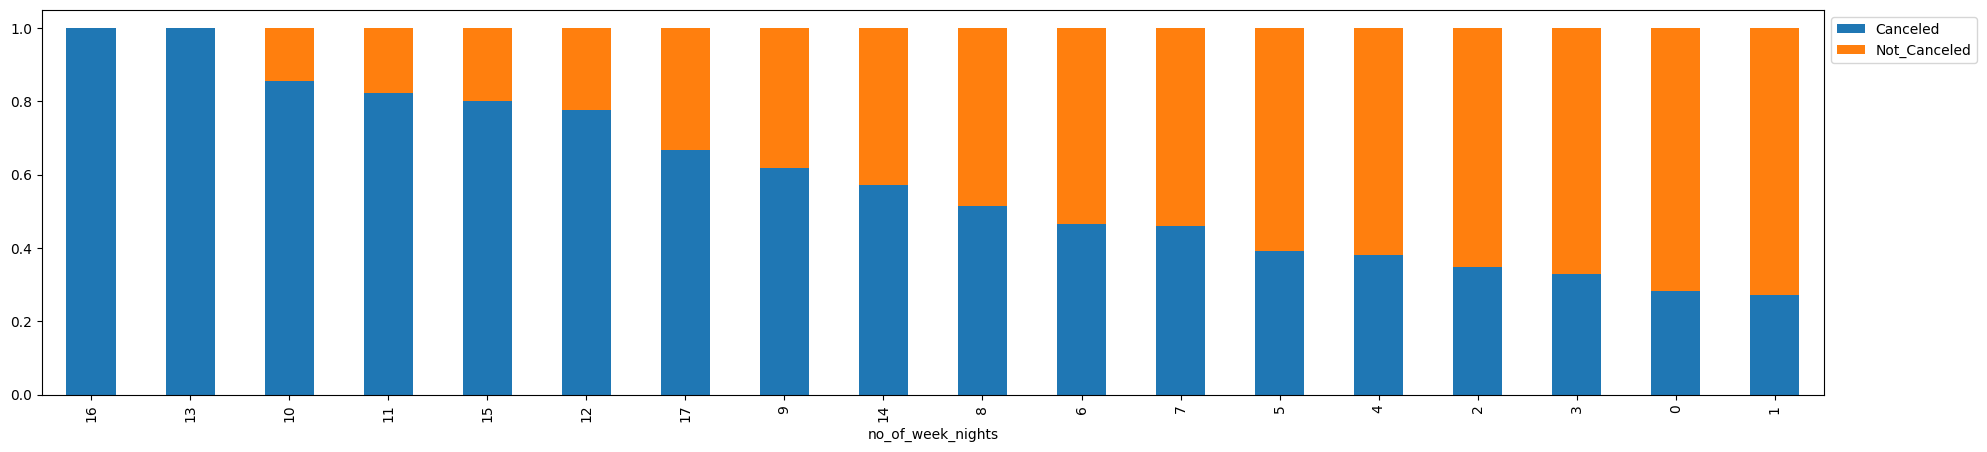

In [285]:
stacked_barplot(data, "no_of_week_nights", "booking_status")

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


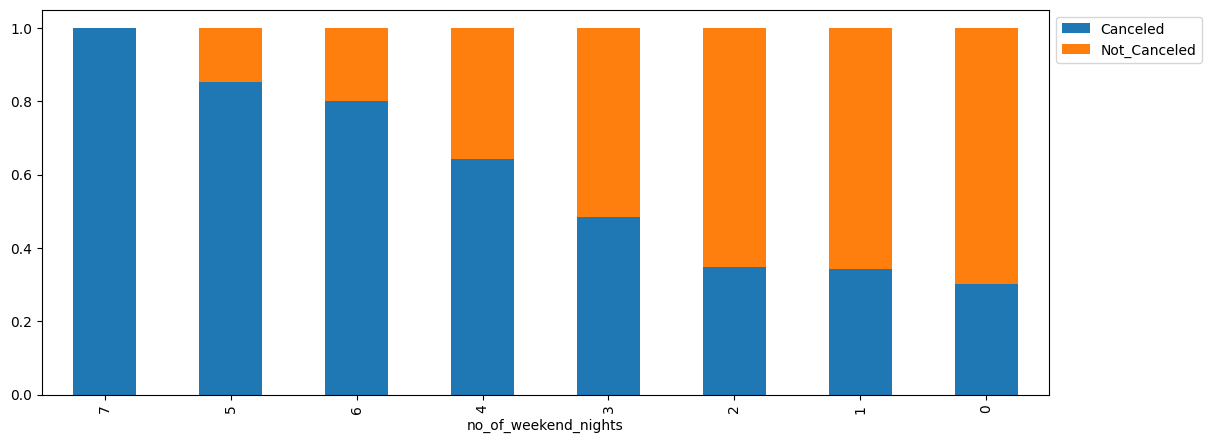

In [286]:
stacked_barplot(data, "no_of_weekend_nights", "booking_status")

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


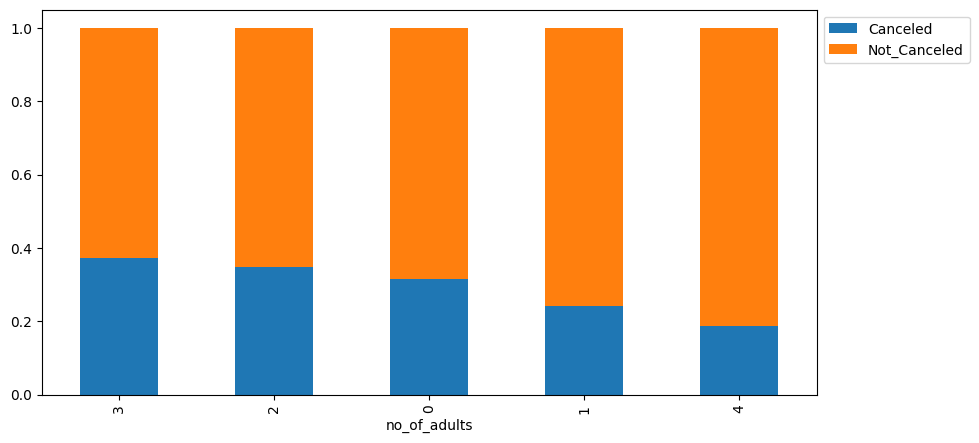

In [287]:
stacked_barplot(data, "no_of_adults", "booking_status")

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


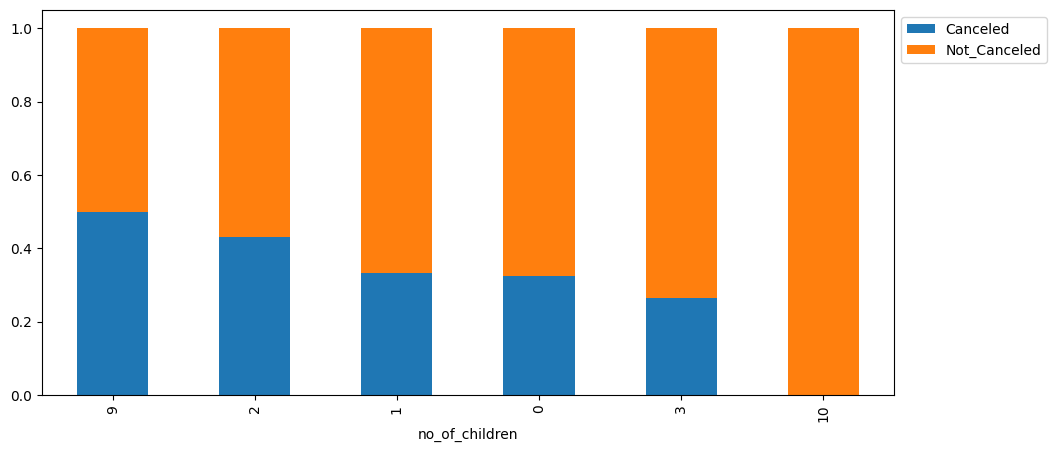

In [288]:
stacked_barplot(data, "no_of_children", "booking_status")

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


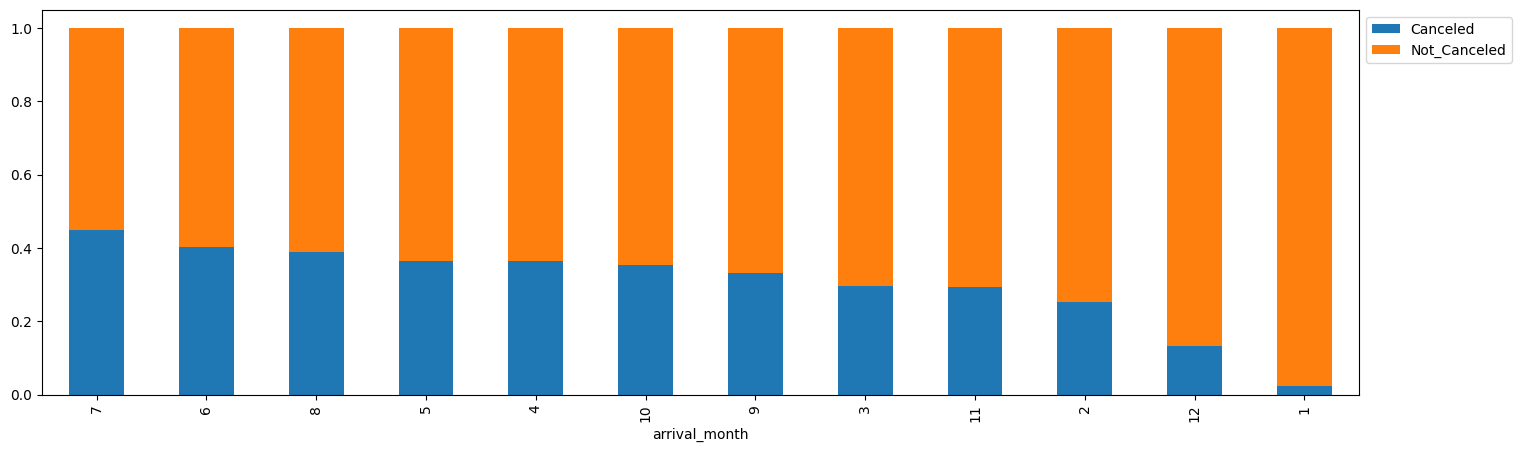

In [289]:
stacked_barplot(data, "arrival_month", "booking_status")

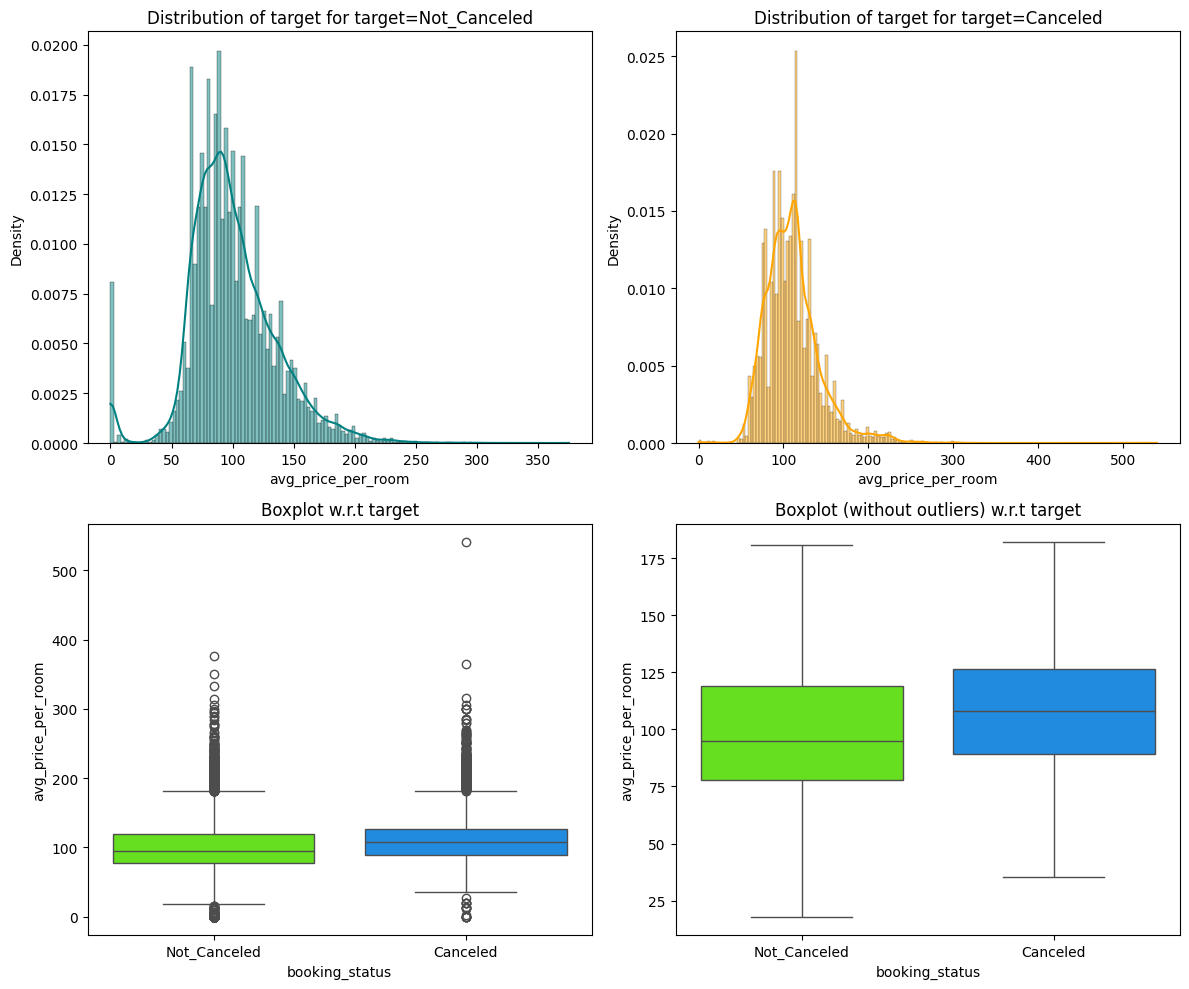

In [290]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

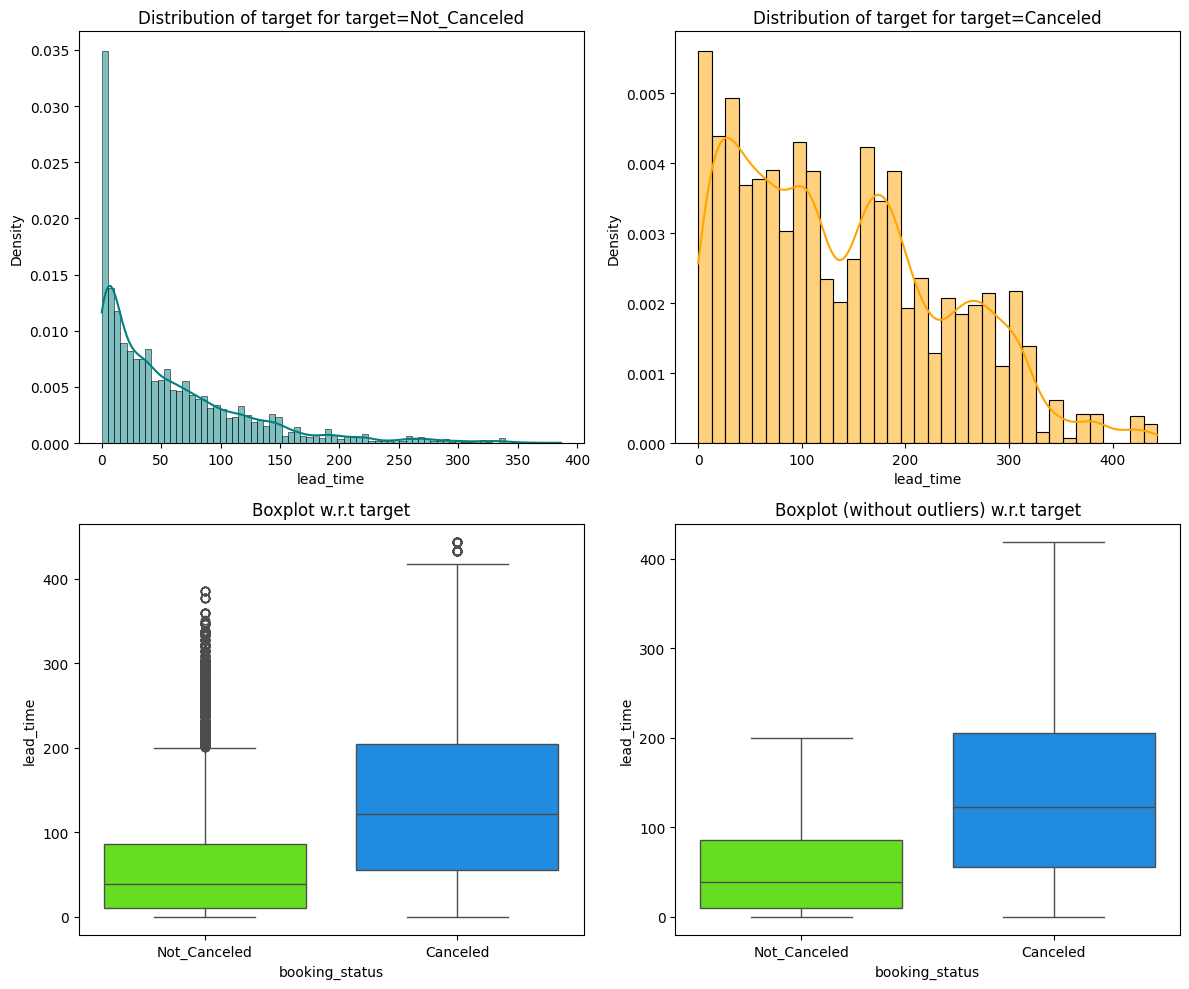

In [291]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

#Data Preprocessing

In [292]:
#data = data.drop(['arrival_year', 'arrival_date'], axis=1)

In [293]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['booking_status']= label_encoder.fit_transform(data['booking_status'])

data['booking_status'].unique()

array([1, 0])

In [294]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,0


#Outlier check

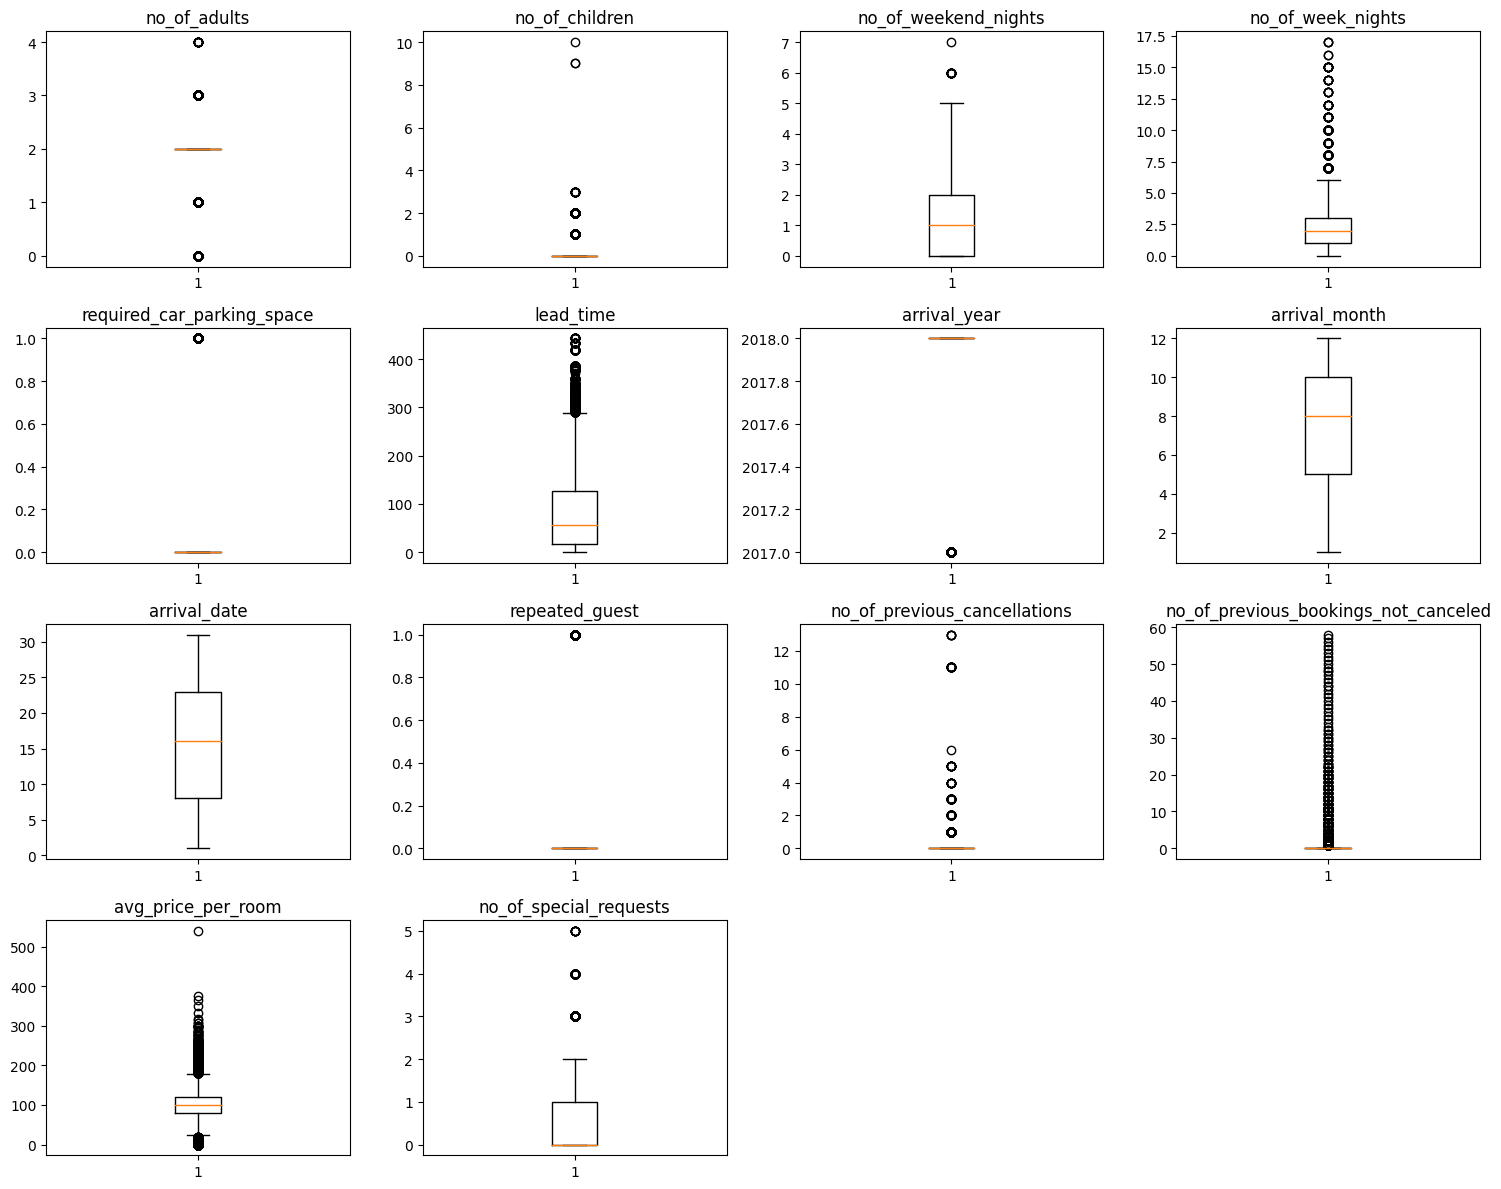

In [295]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#Data Prepration for Modelling

In [296]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42           ## Complete the code to split the data into train and test in the ratio 75:25
)

In [297]:
## Reset the index of y_train so that both x and y have same indexes for training dataset

y_train.reset_index(inplace = True, drop = True)

In [298]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Shape of Training set : ", y_train.shape)
print("Shape of test set : ", y_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (27206, 27)
Shape of test set :  (9069, 27)
Shape of Training set :  (27206,)
Shape of test set :  (9069,)
Percentage of classes in training set:
booking_status
1   0.67437
0   0.32563
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
1   0.66634
0   0.33366
Name: proportion, dtype: float64


#Scailing of the Data

In [299]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

#**Model Bulilding**

Model evaluation criterion

In [300]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [301]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#**Logistics Regression with Stats model**

In [302]:
X_train_with_intercept = SM.add_constant(X_train_scaled)
X_test_with_intercept = SM.add_constant(X_test_scaled)

In [303]:
LogisticReg = SM.Logit(y_train, X_train_with_intercept).fit()
print(LogisticReg.summary())

         Current function value: 0.423789
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27178
Method:                           MLE   Df Model:                           27
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.3284
Time:                        11:53:35   Log-Likelihood:                -11530.
converged:                      False   LL-Null:                       -17168.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    1.5129     76.257      0.020      0.984    -147.948

#Checking Logistic Regression model performance on training set


In [304]:
y_pred = LogisticReg.predict(X_train_with_intercept)

In [305]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, X_train_with_intercept, y_train
)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.80515,0.89115,0.83189,0.86050


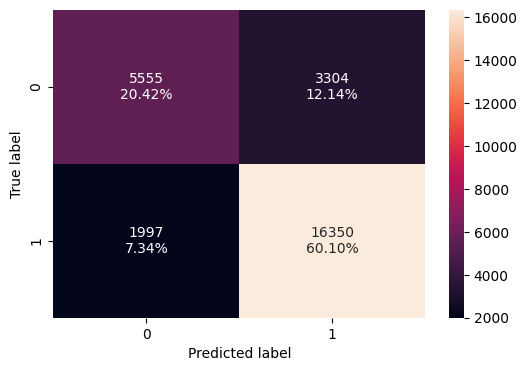

In [306]:
plot_confusion_matrix(LogisticReg, X_train_with_intercept, y_train)

##Checking Logistic Regression model performance on test set

In [307]:
logistic_reg_perf_test = model_performance_classification(
    LogisticReg, X_test_with_intercept, y_test
)
logistic_reg_perf_test

,Accuracy,Recall,Precision,F1
0,0.80703,0.89691,0.82786,0.86100


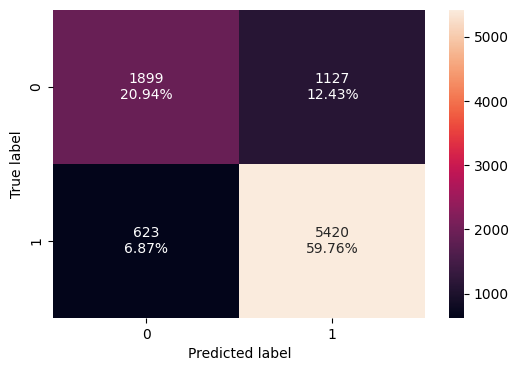

In [308]:
plot_confusion_matrix(LogisticReg, X_test_with_intercept, y_test)

##Naive - Bayes Classifier

In [309]:
#Build Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

##Checking Naive - Bayes Classifier performance on training set

In [310]:
nb_perf_train = model_performance_classification(nb_model, X_train, y_train) ## Complete the code to get model performance on training data
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.67437,1.00000,0.67437,0.80552


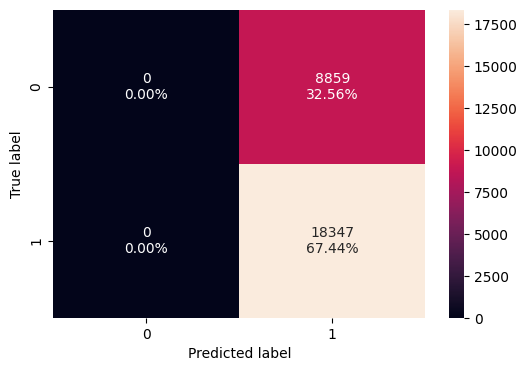

In [311]:
plot_confusion_matrix(nb_model, X_train, y_train)

##Checking Naive - Bayes Classifier performance on test set

In [312]:
nb_perf_test = model_performance_classification(nb_model, X_test, y_test)  ## Complete the code to get model performance on test data
nb_perf_test

,Accuracy,Recall,Precision,F1
0,0.66634,1.00000,0.66634,0.79976


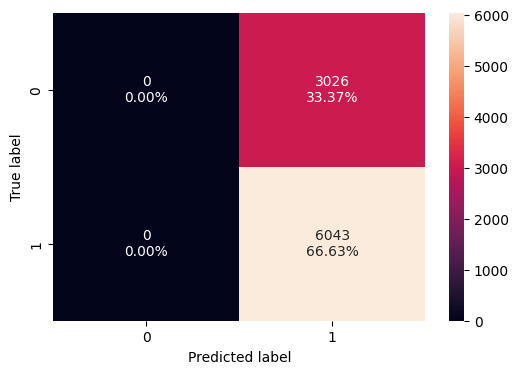

In [313]:
plot_confusion_matrix(nb_model, X_test, y_test)

###KNN Classifier (K = 3)


In [314]:
#Build KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 3)  ## Complete the code to build KNN model with nummber of neighbors as 3
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

###Checking KNN Classifier performance on training set

In [315]:
knn_perf_train = model_performance_classification(knn_model, X_train, y_train)  ## Complete the code to get model performance on training data
knn_perf_train

,Accuracy,Recall,Precision,F1
0,0.67184,0.68954,0.79651,0.73918


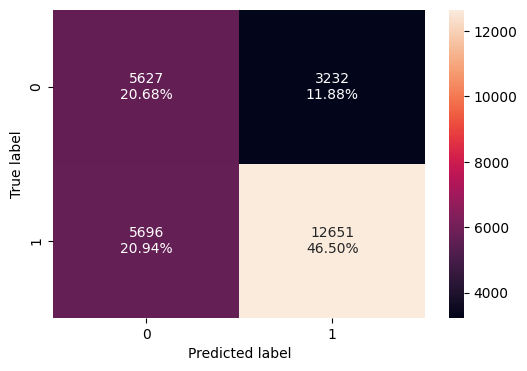

In [316]:
plot_confusion_matrix(knn_model, X_train, y_train)

###Checking KNN Classifier performance on test set

In [317]:
knn_perf_test = model_performance_classification(knn_model, X_test, y_test)  ## Complete the code to get model performance on test data
knn_perf_test

,Accuracy,Recall,Precision,F1
0,0.67847,0.69949,0.79350,0.74354


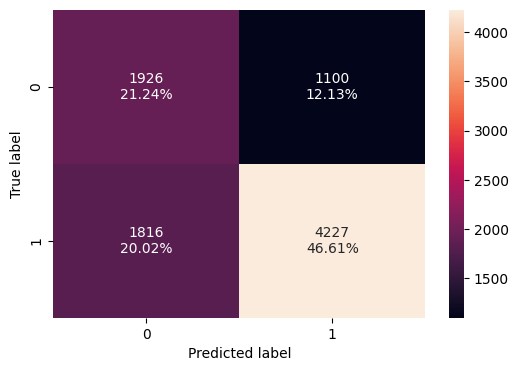

In [318]:
plot_confusion_matrix(knn_model, X_test, y_test)

##Decision Tree Classifier

In [319]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##Checking Decision Tree Classifier performance on training set

In [320]:
decision_tree_perf_train = model_performance_classification(dt_model, X_train, y_train)  ## Complete the code to get model performance on training data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99419,0.99548,0.99591,0.99569


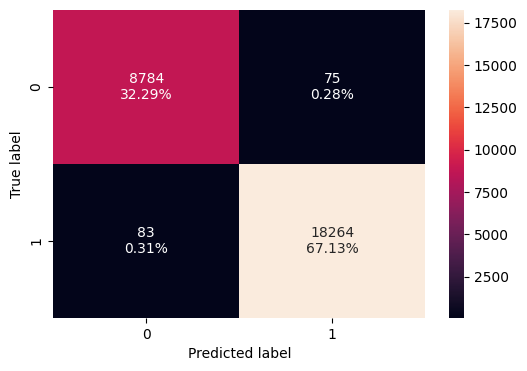

In [321]:
plot_confusion_matrix(dt_model, X_train, y_train)  ## Complete the code to create confusion matrix for training data

##Checking Decision Tree Classifier performance on test set

In [322]:
decision_tree_perf_test = model_performance_classification(dt_model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86922,0.89724,0.90563,0.90141


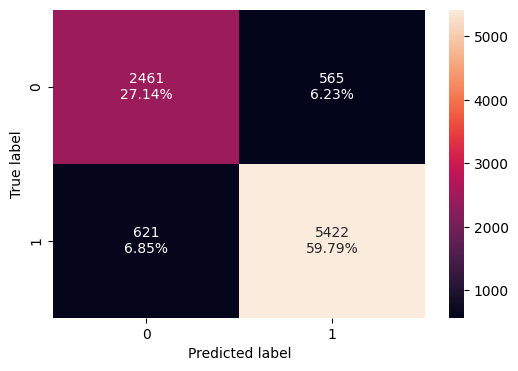

In [323]:
plot_confusion_matrix(dt_model, X_test, y_test)  ## Complete the code to create confusion matrix for test data

#Model Performance Improvement

###Logistic Regression (deal with multicollinearity, remove high p-value variables, determine optimal threshold using ROC curve)

##Logistic Regression - Dealing with Multicollinearity

In [324]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [325]:
# Call the function to calculate VIF
vif_result = calculate_vif(X_train)  ## Complete the code to calculate VIF for the X_train data with intercept

print("Variance Inflation Factors:")
print(vif_result)

Variance Inflation Factors:
                                Variable       VIF
0                           no_of_adults  18.27881
1                         no_of_children   2.11053
2                   no_of_weekend_nights   1.98871
3                      no_of_week_nights   3.81167
4             required_car_parking_space   1.07256
5                              lead_time   2.47952
6                           arrival_year 333.64142
7                          arrival_month   7.22866
8                           arrival_date   4.22653
9                         repeated_guest   1.80488
10          no_of_previous_cancellations   1.38237
11  no_of_previous_bookings_not_canceled   1.63171
12                    avg_price_per_room  18.76868
13                no_of_special_requests   2.02071
14         type_of_meal_plan_Meal Plan 2   1.32014
15         type_of_meal_plan_Meal Plan 3   1.01514
16        type_of_meal_plan_Not Selected   1.44423
17        room_type_reserved_Room_Type 2   1.11666
18 

####Note: If you find any variables with high VIF and wish to drop them, please uncomment and run the below code for the same. Feel free to modify the below code according to your own requirements.

In [326]:
# Uncomment and run the below code to remove the variables with high p-values

#Dropping columns with VIF > 5 iteratively
while vif_result['VIF'].max() > 5:
    high_vif_column = vif_result.loc[vif_result['VIF'].idxmax(), 'Variable']
    print(f"Dropping {high_vif_column} due to high VIF") # Changed printf to print(f" ")
    X_train_scaled.drop(columns=high_vif_column, inplace=True)
    X_test_scaled.drop(columns=high_vif_column, inplace=True)
    vif_result = calculate_vif(X_train_scaled)

Dropping arrival_year due to high VIF
Dropping market_segment_type_Online due to high VIF


Deleting the High P Variables

In [327]:
# initial list of columns
predictors = X_train_with_intercept.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = SM.Logit(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()
    print(f"Dropping column {feature_with_p_max} with p-value: {max_p_value}")

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

         Current function value: 0.423789
         Iterations: 35
Dropping column type_of_meal_plan_Meal Plan 3 with p-value: 0.9971636898156332
         Current function value: 0.423830
         Iterations: 35
Dropping column market_segment_type_Complementary with p-value: 0.9999229308594145
Optimization terminated successfully.
         Current function value: 0.424287
         Iterations 10
Dropping column room_type_reserved_Room_Type 3 with p-value: 0.6566496737884013
Optimization terminated successfully.
         Current function value: 0.424290
         Iterations 10
Dropping column no_of_previous_bookings_not_canceled with p-value: 0.37370249003882994
Optimization terminated successfully.
         Current function value: 0.424313
         Iterations 9
Dropping column arrival_date with p-value: 0.3562431806038432
Optimization terminated successfully.
         Current function value: 0.424328
         Iterations 9
Dropping column market_segment_type_Corporate with p-value: 0.11232

In [328]:
X_train_significant = X_train_with_intercept[selected_features]
X_test_significant = X_test_with_intercept[selected_features]  ## Complete the code to get the test data with selected features
X_train_significant.head(10)

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline,market_segment_type_Online
0,1.00000,0.29945,2.20272,-0.93286,-0.86045,-0.18067,-0.12097,0.46834,0.83979,-0.16191,-0.06357,0.89747,-0.78855,-0.31698,-0.40502,-0.14136,-0.44784,-0.08584,-0.16464,-0.06712,-0.64009,0.75179
1,1.00000,0.29945,-0.26129,-0.93286,1.29141,-0.18067,0.40359,0.46834,-1.11888,-0.16191,-0.06357,-0.24611,-0.78855,-0.31698,-0.40502,-0.14136,-0.44784,11.64962,-0.16464,-0.06712,-0.64009,0.75179
2,1.00000,0.29945,-0.26129,3.68135,4.16057,-0.18067,1.17294,0.46834,0.18690,-0.16191,-0.06357,0.14107,-0.78855,-0.31698,-0.40502,-0.14136,-0.44784,-0.08584,-0.16464,-0.06712,-0.64009,0.75179
3,1.00000,0.29945,-0.26129,1.37425,3.44328,-0.18067,-0.91364,0.46834,1.16623,-0.16191,-0.06357,-0.69396,-0.78855,-0.31698,2.46900,-0.14136,-0.44784,-0.08584,-0.16464,-0.06712,-0.64009,0.75179
4,1.00000,0.29945,-0.26129,0.22070,-0.14316,-0.18067,-0.82038,0.46834,0.51334,6.17619,-0.06357,1.72368,-0.78855,-0.31698,-0.40502,-0.14136,2.23292,-0.08584,-0.16464,-0.06712,-0.64009,0.75179
5,1.00000,0.29945,-0.26129,1.37425,-0.86045,-0.18067,-0.24919,0.46834,0.18690,-0.16191,-0.06357,1.13679,0.48381,-0.31698,-0.40502,-0.14136,2.23292,-0.08584,-0.16464,-0.06712,-0.64009,0.75179
6,1.00000,0.29945,-0.26129,1.37425,-0.14316,-0.18067,-0.98358,0.46834,-1.11888,-0.16191,-0.06357,-0.41305,0.48381,-0.31698,2.46900,-0.14136,-0.44784,-0.08584,-0.16464,-0.06712,-0.64009,0.75179
7,1.00000,0.29945,-0.26129,-0.93286,-0.14316,5.53488,0.70667,0.46834,-0.46599,-0.16191,-0.06357,0.33338,-0.78855,-0.31698,-0.40502,-0.14136,-0.44784,-0.08584,-0.16464,-0.06712,-0.64009,0.75179
8,1.00000,-1.62653,-0.26129,0.22070,-0.14316,-0.18067,-0.99523,-2.13519,0.51334,-0.16191,-0.06357,-0.81191,-0.78855,-0.31698,-0.40502,-0.14136,2.23292,-0.08584,-0.16464,-0.06712,1.56229,-1.33017
9,1.00000,-1.62653,-0.26129,-0.93286,-0.86045,-0.18067,0.38028,0.46834,-1.44533,-0.16191,-0.06357,-0.78342,-0.78855,-0.31698,-0.40502,-0.14136,-0.44784,-0.08584,-0.16464,-0.06712,1.56229,-1.33017


In [329]:
X_train_significant.shape

(27206, 22)

### Training the Logistic Regression model again with only the significant features

In [330]:
LogisticReg_tuned = SM.Logit(y_train, X_train_significant).fit()  ## Complete the code to train the Logistic Regression model with significant features
print(LogisticReg_tuned.summary())

Optimization terminated successfully.
         Current function value: 0.424372
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27184
Method:                           MLE   Df Model:                           21
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.3275
Time:                        11:54:04   Log-Likelihood:                -11545.
converged:                       True   LL-Null:                       -17168.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.1819      0.021     55.082     

###Determining optimal threshold using ROC Curve

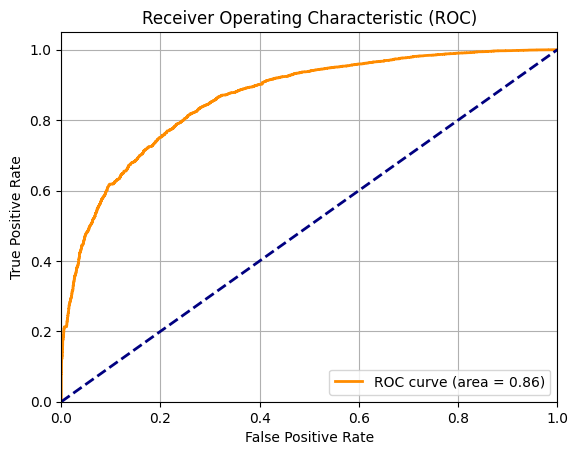

In [331]:
y_pred = LogisticReg_tuned.predict(X_train_significant)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)  ## Complete the code to get the ROC-AUC score
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [332]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.641


###Checking tuned Logistic Regression model performance on training set

In [333]:
logistic_reg_tune_perf_train = model_performance_classification(
    LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit
)
logistic_reg_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.79071,0.81327,0.86806,0.83977


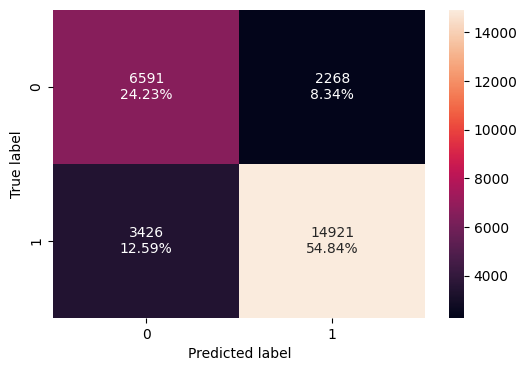

In [334]:
plot_confusion_matrix(LogisticReg_tuned, X_train_significant, y_train, optimal_threshold_logit)

###Checking tuned Logistic Regression model performance on test set

In [335]:
logistic_reg_tune_perf_test = model_performance_classification(
    LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit
)

logistic_reg_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.79050,0.82145,0.85808,0.83936


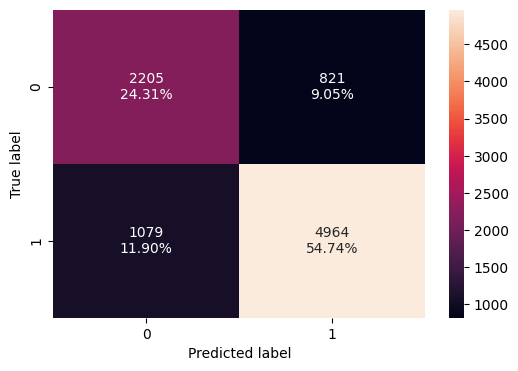

In [336]:
plot_confusion_matrix(LogisticReg_tuned, X_test_significant, y_test, optimal_threshold_logit)

####KNN Classifier (different values of K)

####KNN Classifier Performance Improvement using different k values

In [337]:
# Define the range for k values
k_values = range(5)  ## Complete the code to define the range for k-values between 2 and 20 (both inclusive)

# Initialize variables to store the best k and the highest recall score
best_k = 0
best_recall = 0

# Loop through each k value
for k in k_values:
    # Create and fit the KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors = 5)  ## Complete the code to build KNN model with nummber of neighbors as k in each iteration
    knn.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

    # Print the recall score for the current k value
    print(f'Recall for k={k}: {recall}')

    # Update the best k and best recall score if the current recall is higher
    if recall > best_recall:
        best_recall = recall
        best_k = k

# Print the best k value and its recall score
print(f'\nThe best value of k is: {best_k} with a recall of: {best_recall}')

Recall for k=0: 0.9061724309117988
Recall for k=1: 0.9061724309117988
Recall for k=2: 0.9061724309117988
Recall for k=3: 0.9061724309117988
Recall for k=4: 0.9061724309117988

The best value of k is: 0 with a recall of: 0.9061724309117988


In [338]:
knn_tuned = KNeighborsClassifier(n_neighbors = 5)  ## Complete the code to build KNN model with nummber of neighbors as best_k
knn_tuned.fit(X_train_scaled, y_train)

KNeighborsClassifier()

##Checking tuned KNN model performance on training set

In [339]:
knn_tuned_perf_train = model_performance_classification(knn_tuned, X_train_scaled, y_train)  ## Complete the code to get model performance on training data
knn_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.89116,0.93552,0.90613,0.92059


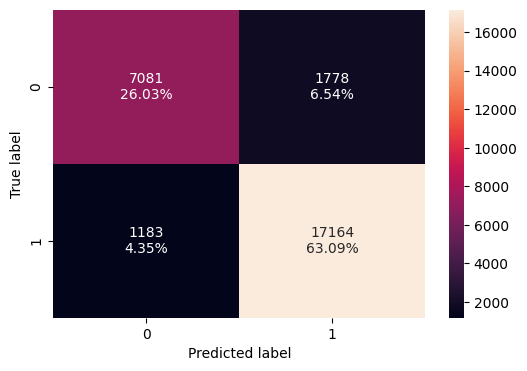

In [340]:
plot_confusion_matrix(knn_tuned, X_train_scaled, y_train)

### Checking tuned KNN model performance on test set

In [341]:
knn_tuned_perf_test = model_performance_classification(knn_tuned, X_test_scaled, y_test)  ## Complete the code to get model performance on test data
knn_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.84772,0.90617,0.87059,0.88802


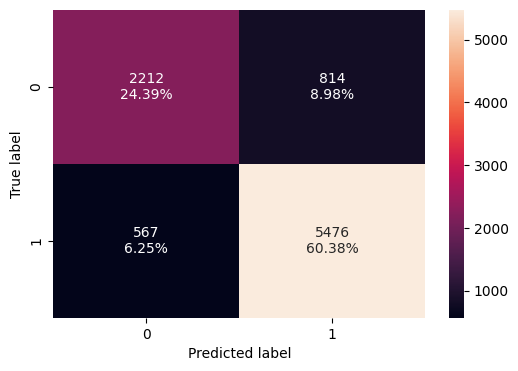

In [342]:
plot_confusion_matrix(knn_tuned, X_test_scaled, y_test)

#Decision Tree Classifier (pre-pruning)

###Pre-pruning the tree

**Note**: The parameter values provided are a sample. You can feel free to add/remove values to experiment with different parameter combinations.

In [343]:
# Choose the type of classifier.
dt_model_tuned = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 13, 2),                          ## Max Depth of the decision tree
    "max_leaf_nodes": [10, 20, 40, 50, 75, 100],               ## Maximum number of leaf nodes
    "min_samples_split": [2, 5, 7, 10, 20, 30],                ## Minimum number of samples required to split an internal node
    "class_weight": ['balanced', None]                         ## whether or not to used balanced weights for impurity computations
}

# # Type of scoring used to compare parameter combinations
# acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned, parameters, scoring='recall', cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_model_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=100, random_state=42)

### Checking tuned Decision Tree Classifier performance on training set

In [344]:
decision_tree_tuned_perf_train = model_performance_classification(dt_model_tuned, X_train, y_train)  ## Complete the code to get model performance on training data
decision_tree_tuned_perf_train

,Accuracy,Recall,Precision,F1
0,0.87683,0.92942,0.89240,0.91053


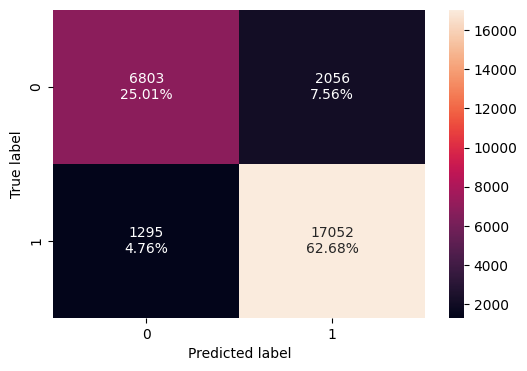

In [345]:
plot_confusion_matrix(dt_model_tuned, X_train, y_train)

### Checking tuned Decision Tree Classifier performance on test set

In [346]:
decision_tree_tuned_perf_test = model_performance_classification(dt_model_tuned, X_test, y_test)  ## Complete the code to get model performance on test data
decision_tree_tuned_perf_test

,Accuracy,Recall,Precision,F1
0,0.87341,0.92951,0.88610,0.90728


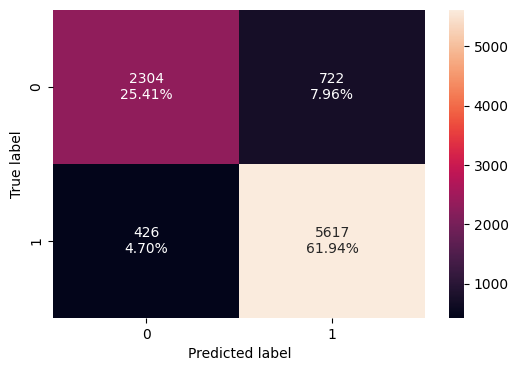

In [347]:
plot_confusion_matrix(dt_model_tuned, X_test, y_test)  ## Complete the code to create confusion matrix for test data

### Visualizing the Decision Tree

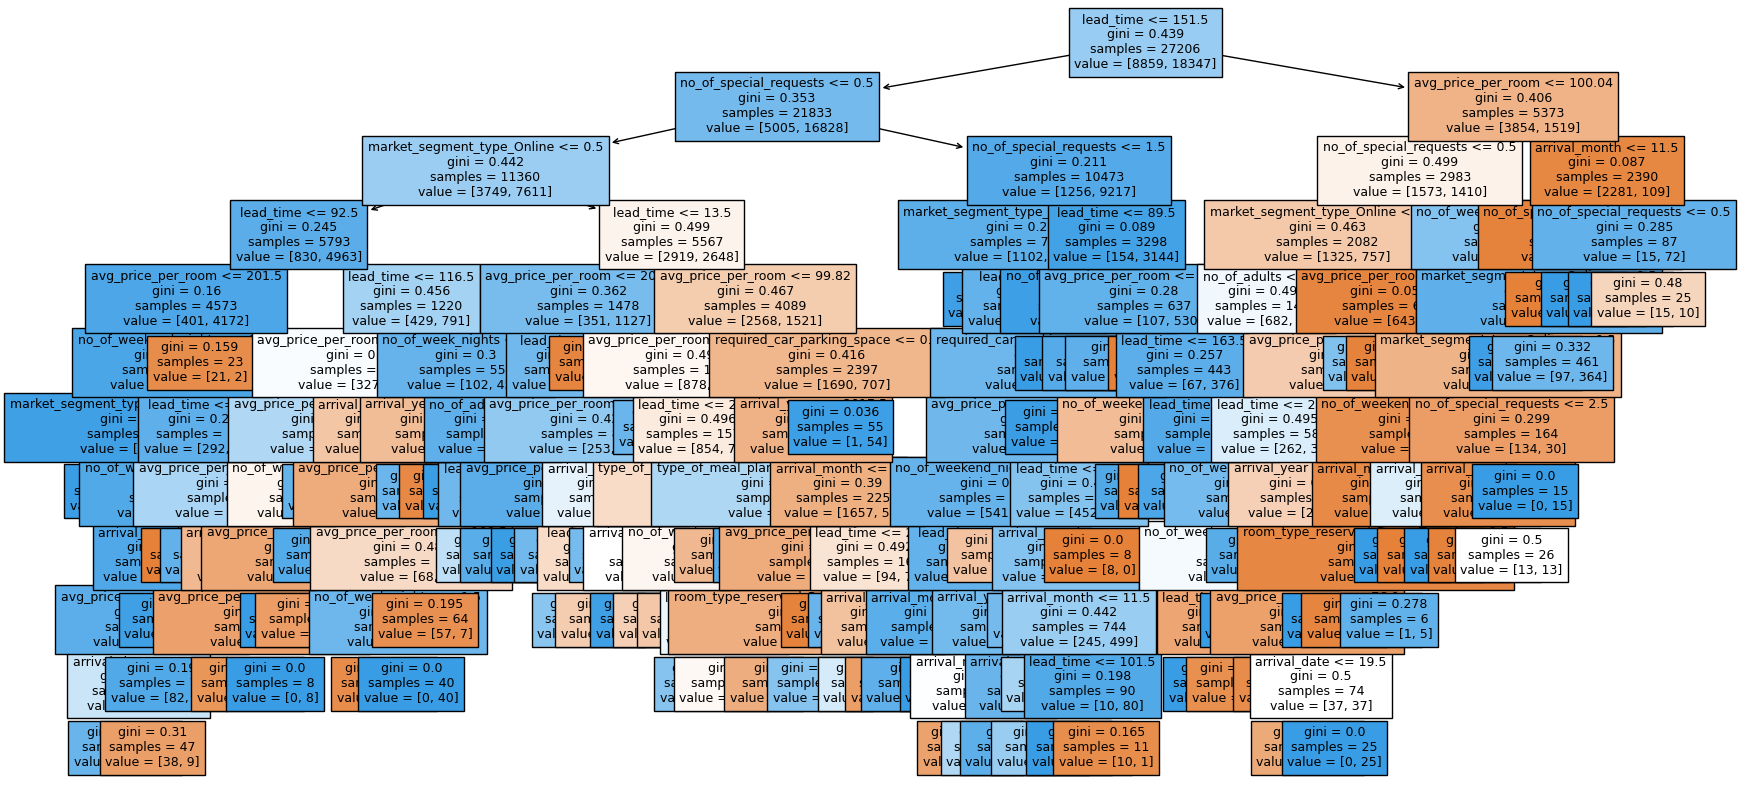

In [348]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_tuned,
    feature_names=X_train.columns.tolist(),
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Analyzing Feature Importance for tuned Decision Tree Classifier

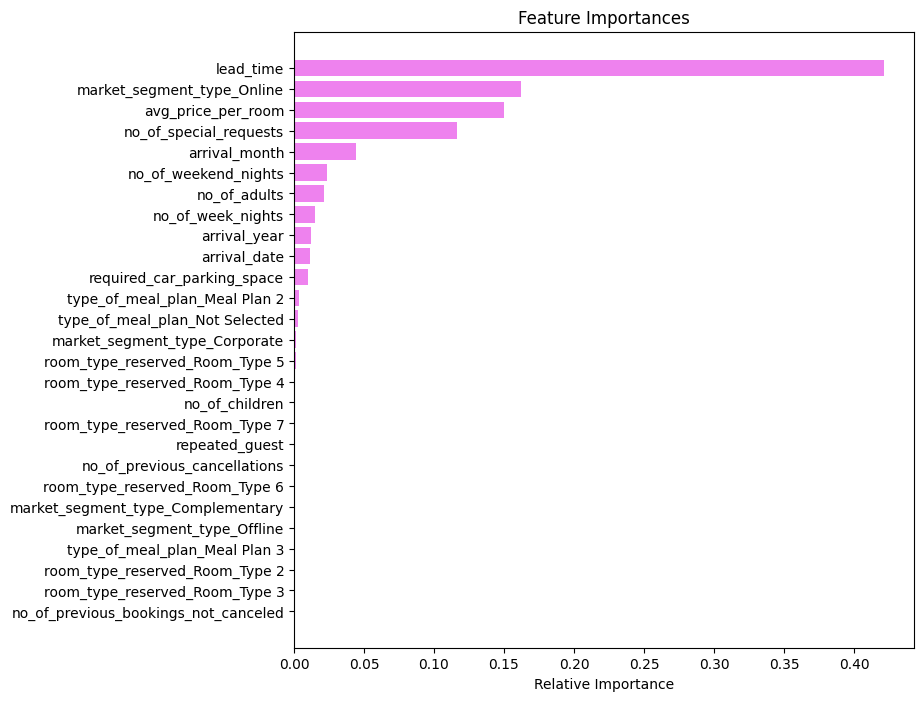

In [349]:
# Uncomment and run to check feature importance for Tuned Decision Tree model


# # importance of features in the tree building

feature_names = X_train.columns.tolist()
importances = dt_model_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# **Model Performance Comparison and Final Model Selection**

In [350]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_train.T,
        knn_perf_train.T,
        knn_tuned_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tuned_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Tuned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Naive Bayes Base,KNN Base,KNN Tuned,Decision Tree Base,Decision Tree Tuned
Accuracy,0.80515,0.79071,0.67437,0.67184,0.89116,0.99419,0.87683
Recall,0.89115,0.81327,1.00000,0.68954,0.93552,0.99548,0.92942
Precision,0.83189,0.86806,0.67437,0.79651,0.90613,0.99591,0.89240
F1,0.86050,0.83977,0.80552,0.73918,0.92059,0.99569,0.91053


In [351]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_test.T,
        knn_perf_test.T,
        knn_tuned_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tuned_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Tuned"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Logistic Regression Tuned,Naive Bayes Base,KNN Base,KNN Tuned,Decision Tree Base,Decision Tree Tuned
Accuracy,0.80515,0.79071,0.66634,0.67847,0.84772,0.86922,0.87341
Recall,0.89115,0.81327,1.00000,0.69949,0.90617,0.89724,0.92951
Precision,0.83189,0.86806,0.66634,0.79350,0.87059,0.90563,0.88610
F1,0.86050,0.83977,0.79976,0.74354,0.88802,0.90141,0.90728
